<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

# 단일 변수 선형 회귀 모델



$\hat{y}=\beta_0 + \beta_1x$



In [5]:
import numpy as np

## 선형 회귀 분석을 보이기 위한 임의의 데이터 생성

In [6]:
# 표준정규분포(평균=0, 분산=1인 정규분포)를 따르는 임의의 변수 100개를 생성
x = np.random.normal(size=100)

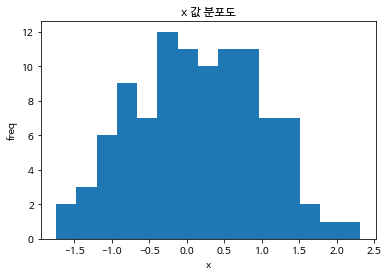

In [7]:
# x의 히스토그램 
plt.hist(x, bins=15)
plt.xlabel("x")
plt.ylabel("freq")
plt.title("x 값 분포도")
plt.show()

In [8]:
# 기울기가 beta_1, 절편이 beta_0 이고 표준편차를 0.2의 노이즈를 주어 y값을 생성
beta_0, beta_1, noise = 2.5, 3.2, 1.0
y = x * beta_1 + beta_0 + np.random.normal(scale=0.2, size=100)

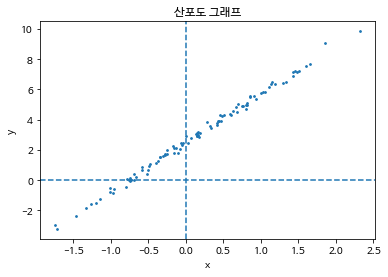

In [18]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3)
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프")
plt.show()

임의로 생성한 데이터셋으로 단일변수 선형회귀모델을 학습시켜보자.

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.expand_dims(x, axis=-1), y)

LinearRegression()

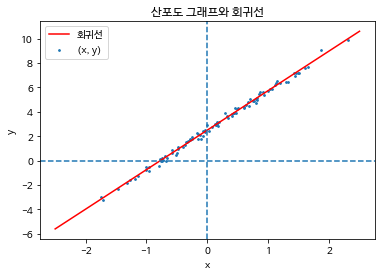

In [17]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
plt.plot(np.linspace(-2.5, 2.5, 10), lr.predict(np.expand_dims(np.linspace(-2.5, 2.5, 10), -1)), c='r', label='회귀선')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

In [12]:
lr.coef_, lr.intercept_

(array([3.16223042]), 2.4918147144234646)